# Comparison of the performance of different reduced amino acid alphabets

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from util import *

# set path to data folder
root = "F:/Studium/Master/semester5/thesis/data/dataset/"

# definition of the true positive species zymoMock
species_zymo_mock = {
    "Pseudomonas aeruginosa",
    "Escherichia coli",
    "Salmonella enterica",
    "Staphylococcus aureus",
    "Limosilactobacillus fermentum",
    "Enterococcus faecalis",
    "Listeria monocytogenes",
    "Bacillus subtilis",
    "Saccharomyces cerevisiae",
    "Cryptococcus neoformans"}

# definition of the true positive species zymoOral
species_zymo_oral = {
    "Streptococcus parasanguinis",
    "Veillonella parvula",
    "Neisseria subflava",
    "Prevotella nigrescens",
    "Streptococcus mitis",
    "Haemophilus parainfluenzae",
    "Schaalia odontolytica",
    "Rothia dentocariosa",
    "Streptococcus salivarius",
    "Fusobacterium nucleatum",
    "Streptococcus mutans",
    "Porphyromonas gingivalis"}

# total read count in zymoMock dataset
total_zymo_mock = 1_160_526
# total read count in zymoOral dataset
total_zymo_oral = 1_140_052
# reading the taxonomic tree
tree = Tree(root + "tree_nr.txt")
# generate dictionary with all taxa that are true positives for each taxonomic rank
true_taxons_zymo_mock = get_true_taxons_for_all_ranks(tree, species_zymo_mock)
true_taxons_zymo_oral = get_true_taxons_for_all_ranks(tree, species_zymo_oral)

In [40]:
# read table with paths to datasets and metadata
data_zymo_mock_metadata = pd.read_csv("datasets_zymo_mock_metadata.tsv", sep="\t", header=0).fillna("")
data_zymo_mock = pd.DataFrame()
for i, row in data_zymo_mock_metadata.iterrows():
    # filter out other k-mer sizes
    if row["kmer size"] != 13:
        continue
    # read per taxon assignment files and keep taxa with at least one read assigned by the "OVO (1.00) read count cumulative" algorithm
    per_taxon_assignment = read_per_taxon_assignment(root + row.path, ovo_1_threshold=1)
    # classify taxa as true positive or false positive
    per_taxon_assignment = classify_assigned_taxa(per_taxon_assignment, true_taxons_zymo_mock)
    # calculate precision and recall
    per_taxon_assignment = get_precision_recall_for_algorithm(per_taxon_assignment, "OVO (1.00) kmer count (cumulative)", total_zymo_mock)
    per_taxon_assignment["alphabet"] = row["alphabet"]
    data_zymo_mock = pd.concat([data_zymo_mock, per_taxon_assignment], ignore_index=True, axis=0)
data_zymo_mock

true positive,rank,false positive,true positive,precision,recall,alphabet
0,class,29643.0,1011456.0,0.971527,0.871550,Uniform11S
1,family,27444.0,984835.0,0.972889,0.848611,Uniform11S
2,genus,54708.0,853055.0,0.939733,0.735059,Uniform11S
3,kingdom,2827.0,1083841.0,0.997398,0.933922,Uniform11S
4,order,21338.0,998320.0,0.979073,0.860231,Uniform11S
...,...,...,...,...,...,...
67,kingdom,0.0,1053882.0,1.000000,0.908107,Uniform16
68,order,3927.0,998754.0,0.996084,0.860605,Uniform16
69,phylum,2498.0,1023601.0,0.997566,0.882015,Uniform16
70,species,83403.0,491481.0,0.854922,0.423498,Uniform16


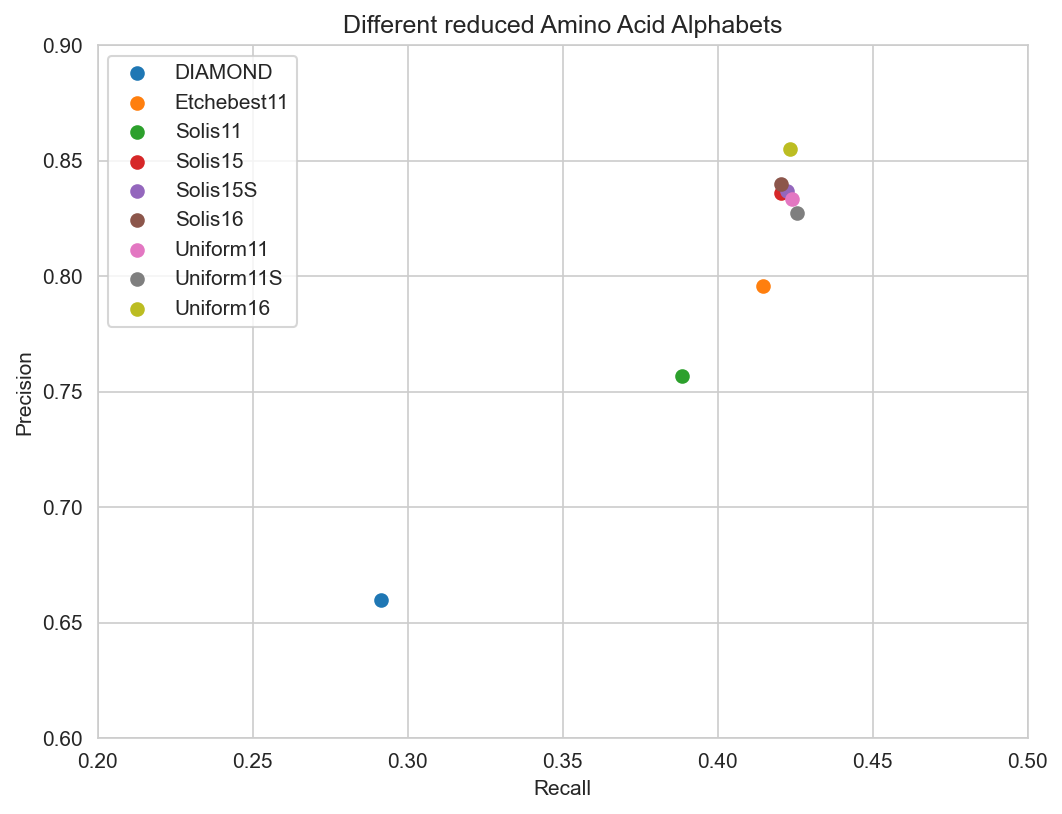

In [41]:
plt.figure(figsize=(8, 6), dpi=150)

rank = "species"

for i, alphabet in enumerate(sorted(data_zymo_mock["alphabet"].unique())):
    data_filtered = data_zymo_mock[(data_zymo_mock["rank"] == rank) & (data_zymo_mock["alphabet"] == alphabet)]
    plt.scatter(data_filtered["recall"], data_filtered["precision"], label=alphabet)

plt.xlim(0.2, 0.5)
plt.ylim(0.6, 0.9)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Different reduced Amino Acid Alphabets")

plt.legend(loc="upper left")
plt.show()

In [20]:
# read table with paths to datasets and metadata
data_zymo_oral_metadata = pd.read_csv("datasets_zymo_oral_metadata.tsv", sep="\t", header=0).fillna("")
data_zymo_oral = pd.DataFrame()
for i, row in data_zymo_oral_metadata.iterrows():
    # filter out other k-mer sizes
    if row["kmer size"] != 13:
        continue
    # read per taxon assignment files and keep taxa with at least one read assigned by the "OVO (1.00) read count cumulative" algorithm
    per_taxon_assignment = read_per_taxon_assignment(root + row.path, ovo_1_threshold=1)
    # classify taxa as true positive or false positive
    per_taxon_assignment = classify_assigned_taxa(per_taxon_assignment, true_taxons_zymo_oral)
    # calculate precision and recall
    per_taxon_assignment = get_precision_recall_for_algorithm(per_taxon_assignment, "OVO (1.00) kmer count (cumulative)", total_zymo_oral)
    per_taxon_assignment["alphabet"] = row["alphabet"]
    data_zymo_oral = pd.concat([data_zymo_oral, per_taxon_assignment], ignore_index=True, axis=0)
data_zymo_oral

true positive,rank,false positive,true positive,precision,recall,alphabet
0,class,8678.0,1128596.0,0.992369,0.989951,Uniform11S
1,family,13358.0,1119989.0,0.988214,0.982402,Uniform11S
2,genus,21525.0,1107578.0,0.980936,0.971515,Uniform11S
3,kingdom,213.0,1131999.0,0.999812,0.992936,Uniform11S
4,order,12191.0,920979.0,0.986936,0.807839,Uniform11S
...,...,...,...,...,...,...
67,kingdom,3.0,1131358.0,0.999997,0.992374,Uniform16
68,order,11823.0,920704.0,0.987322,0.807598,Uniform16
69,phylum,23.0,1136873.0,0.999980,0.997212,Uniform16
70,species,548872.0,449501.0,0.450234,0.394281,Uniform16


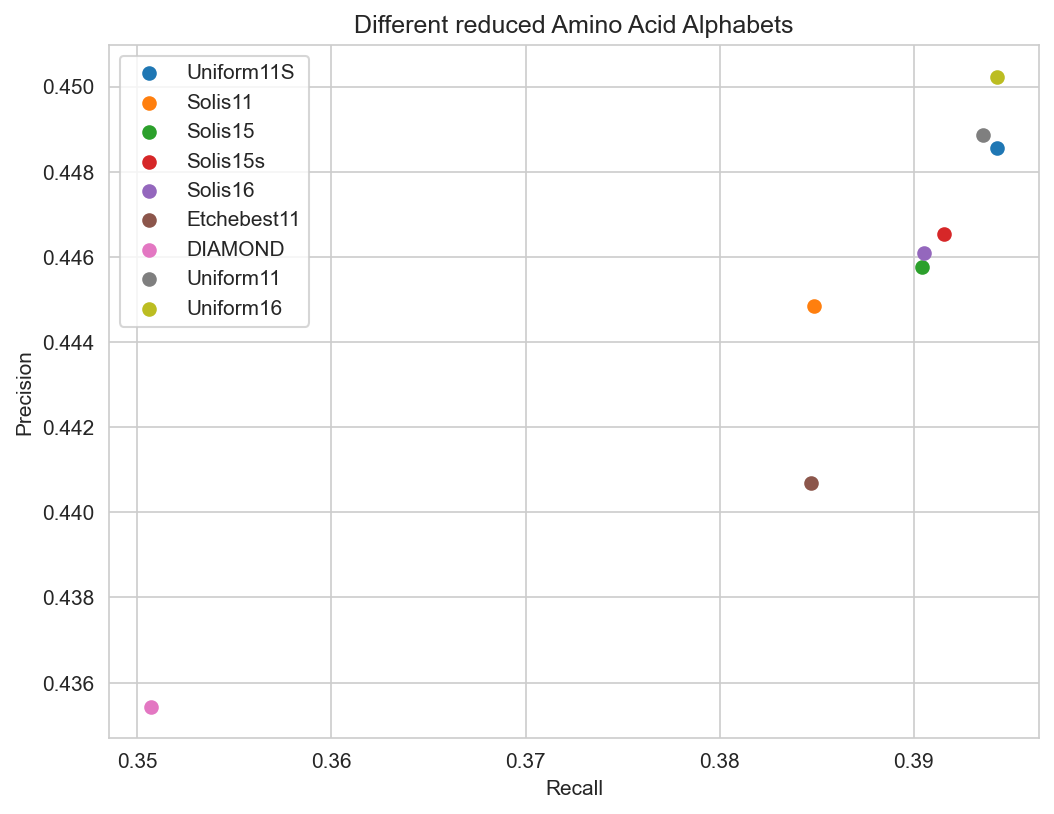

In [26]:
plt.figure(figsize=(8, 6), dpi=150)

rank = "species"

for alphabet in data_zymo_oral["alphabet"].unique():
    data_filtered = data_zymo_oral[(data_zymo_oral["rank"] == rank) & (data_zymo_oral["alphabet"] == alphabet)]
    plt.scatter(data_filtered["recall"], data_filtered["precision"], label=alphabet)

# plt.xlim(0.3, 0.4)
# plt.ylim(0.3, 0.5)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Different reduced Amino Acid Alphabets")

plt.legend(loc="upper left")
plt.show()